# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [63]:
# TODO: Load the three CSV files into dataframes
provider_df = pd.read_csv('data/provider_data.csv')
facility_df = pd.read_csv('data/facility_data.csv')
encounter_df = pd.read_csv('data/encounter_data.csv')

# TODO: Print the shapes of each dataframe
print("Provider data shape:", provider_df.shape)
print("Facility data shape:", provider_df.shape)
print("Encounter data shape:", encounter_df.shape)

# TODO: Merge the dataframes for analysis
# 
merged_df = pd.merge(encounter_df,provider_df, on='provider_id', how='left')
print("\nColumns:", merged_df.columns.tolist())

for col in merged_df.columns:
    # Drop columns ending with _y
    if col.endswith('_y'):
        merged_df.drop(columns=[col], inplace=True)

rename = {col: col.replace('_x', '') for col in merged_df.columns if '_x' in col}
merged_df.rename(columns=rename, inplace=True)


merged_df = pd.merge(merged_df, facility_df, on='facility_id', how = 'left')
for col in merged_df.columns:
    # Drop columns ending with _y
    if col.endswith('_y'):
        merged_df.drop(columns=[col], inplace=True)

rename = {col: col.replace('_x', '') for col in merged_df.columns if '_x' in col}
merged_df.rename(columns=rename, inplace=True)
print("\nColumns:", merged_df.columns.tolist())


# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed

#
# TODO: Print the merged dataframe shape, columns, and first few rows
print("\nMerged data shape:", merged_df.shape)
print("\nColumns:", merged_df.columns.tolist())
print("\nFirst few rows:")
print(merged_df.head())

Provider data shape: (500, 7)
Facility data shape: (500, 7)
Encounter data shape: (5000, 12)

Columns: ['encounter_id', 'patient_id', 'provider_id', 'facility_id_x', 'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code', 'service_charge', 'insurance_paid', 'patient_paid', 'region', 'provider_name', 'provider_type', 'facility_id_y', 'specialty', 'years_experience', 'license_number']

Columns: ['encounter_id', 'patient_id', 'provider_id', 'facility_id', 'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code', 'service_charge', 'insurance_paid', 'patient_paid', 'region', 'provider_name', 'provider_type', 'specialty', 'years_experience', 'license_number', 'facility_name', 'facility_type', 'beds', 'established_date']

Merged data shape: (5000, 21)

Columns: ['encounter_id', 'patient_id', 'provider_id', 'facility_id', 'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code', 'service_charge', 'insurance_paid', 'patient_paid', 'region', 'provider_

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [64]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
facility_group = merged_df.groupby(['facility_name'],as_index= False)
print(facility_group.head())
# TODO: Calculate mean, sum, count for years_experience by facility
# TODO: Calculate total encounter charges by facility
# TODO: Calculate total insurance payments by facility
# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid

facility_summary = facility_group.agg(
    years_experience_facility=('years_experience', 'mean'),
    total_encounter_charge=('service_charge', 'sum'),
    total_insurance_paid=('insurance_paid', 'sum')
)
display(facility_summary)


# TODO: Find the facility with highest total encounter charges
highest_total_encounter = facility_summary.loc[
    facility_summary['total_encounter_charge'].idxmax(),
    ['facility_name', 'total_encounter_charge']
]
print("Facility with highest total encounter charges:")
print(highest_total_encounter)

# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'

facility_summary.to_csv("output/q1_groupby_analysis.csv", index=False)
print(f"\nSummary saved to {output_path}")

   encounter_id patient_id provider_id facility_id encounter_date  \
0      ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1      ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2      ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3      ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4      ENC00005   PAT01388      PR0354      FAC003     2023-06-14   
5      ENC00006   PAT01849      PR0118      FAC004     2023-05-24   
6      ENC00007   PAT00833      PR0193      FAC004     2023-05-05   
7      ENC00008   PAT01503      PR0475      FAC001     2023-02-06   
8      ENC00009   PAT01510      PR0321      FAC004     2023-03-03   
9      ENC00010   PAT00557      PR0260      FAC010     2023-01-15   
10     ENC00011   PAT01851      PR0125      FAC005     2023-04-16   
11     ENC00012   PAT01059      PR0087      FAC006     2023-08-09   
13     ENC00014   PAT01403      PR0343      FAC003     2023-05-11   
14     ENC00015   PAT00942      PR

,facility_name,years_experience_facility,total_encounter_charge,total_insurance_paid
0,Cardiology Specialty Center,19.319728,276658.83,222139.04
1,City General Hospital,19.563008,295508.13,236798.50
2,Community Health Clinic,20.160784,334992.21,269207.92
3,Emergency Medical Center,19.668687,310735.25,248439.20
4,Northside Urgent Care,20.137014,297283.06,236839.71
5,Oncology Treatment Center,19.381139,334927.30,267183.95
6,Pediatric Care Center,19.811676,361811.04,291790.95
7,Primary Care Clinic,20.102970,323315.71,260297.44
8,Regional Medical Center,20.209205,316284.98,251750.43
9,Surgical Specialty Center,20.778182,349909.18,278503.38


Facility with highest total encounter charges:
facility_name             Pediatric Care Center
total_encounter_charge                361811.04
Name: 6, dtype: object

Summary saved to output/q2_performance_report.txt


### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [65]:
# TODO: Add facility mean years_experience as new column
merged_df['facility_mean_years_experience'] = (
    merged_df.groupby('facility_name')['years_experience']
    .transform('mean')
)
# TODO: Add facility standard deviation of years_experience
merged_df['facility_std_years_experience'] = (
    merged_df.groupby('facility_name')['years_experience']
    .transform('std')
)
# TODO: Create normalized years_experience (z-score within facility)
merged_df['Normalized_years_experience'] = merged_df.groupby('facility_name')['years_experience'].transform(lambda x: (x - x.mean()) / x.std())
# TODO: Add facility total encounter charges as new column
merged_df['facility_total_encounter_charges'] = (
    merged_df.groupby('facility_name')['service_charge']
    .transform('sum')
)
# TODO: Display the enhanced dataframe
display(merged_df)
# TODO: Save results as 'output/q1_aggregation_report.txt'

output_path = "output/q1_aggregation_report.txt"
merged_df.to_string(output_path, index=False)
print(f"\nEnhanced dataframe saved to {output_path}")

,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,years_experience,license_number,facility_name,facility_type,beds,established_date,facility_mean_years_experience,facility_std_years_experience,Normalized_years_experience,facility_total_encounter_charges
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.863495,297283.06
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-0.052607,295508.13
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-1.547636,295508.13
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-1.336020,297283.06
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10,20.209205,11.575935,1.364105,316284.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,...,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31,20.160784,11.044011,1.434191,334992.21
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,...,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.485474,297283.06
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,...,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,-0.402960,334927.30
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,...,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,0.424825,334927.30



Enhanced dataframe saved to output/q1_aggregation_report.txt


## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [66]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
first_filter = merged_df.groupby('facility_name').filter( lambda x: x ['provider_id'].count() > 20)

# TODO: Filter facilities with average years_experience > 10 (experienced staff)
second_filter = first_filter.groupby('facility_name').filter( lambda x: x ['facility_mean_years_experience'].mean() > 10)

# TODO: Filter facilities with total encounter charges > 250000 (high volume)
third_filter = second_filter.groupby('facility_name').filter( lambda x: x ['facility_total_encounter_charges'].sum() > 250000)
# TODO: Create a summary of filtered results
summary_filtered_results = (
    third_filter.groupby('facility_name')
    .agg(
        total_providers=('provider_id', 'nunique'),
        facility_mean_years_experience=('facility_mean_years_experience', 'mean'),
        total_encounter_charges=('facility_total_encounter_charges', 'sum')
    )
    .reset_index()
)
# TODO: Save results as 'output/q2_filter_analysis.csv'
summary_filtered_results.to_csv("output/q2_filter_analysis.csv", index=False)

### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [67]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    return pd.Series ({
        'mean':group['years_experience'].mean(),
        'std':group['years_experience'].std(),
        'min': group['years_experience'].min(),
        'max': group['years_experience'].max(),
        'range': group['years_experience'].max() - group['years_experience'].min()

    })
    # TODO: Return mean, std, min, max, range for years_experience
    pass

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = merged_df.groupby('facility_name').apply(provider_stats, include_groups=False)

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    if 'encounter_count' not in group.columns:
        group['encounter_count'] = group.groupby('provider_id')['provider_id'].transform('count')
    
    # Select top n providers by encounter_count
    top_n = group.sort_values('encounter_count', ascending=False).head(n)
    
    # Return only selected columns
    return top_n[['provider_id', 'provider_name', 'years_experience', 'specialty', 'encounter_count']]

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = merged_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column

# TODO: Save results as 'output/q2_performance_report.txt'
output_path = "output/q2_performance_report.txt"
top_providers_by_facility.to_string(output_path, index=False)

/tmp/ipykernel_14003/1192051690.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = merged_df.groupby('facility_name').apply(


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [100]:
# TODO: Group by facility type and region
grouped = merged_df.groupby(['facility_type','region'])
display(grouped)
# TODO: Calculate statistics for each facility_type-region combination
hierarchical_stats = grouped.agg(
    'mean','sum','std'
).reset_index()

# TODO: Use unstack to convert to wide format
wide_format = hierarchical_stats.set_index(['facility_type','region']).unstack(level='region')
display(wide_format)
# TODO: Use stack to convert back to long format
long_format = wide_format.stack(level='region').reset_index()
display(long_format)
# TODO: Analyze the hierarchical structure
print(long_format.groupby('facility_type').sum())
# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
hierarchical_stats.to_csv("output/q2_hierarchical_analysis.csv", index=False)

procedure_code                             service_charge  \
region                    North         South          West          North   
facility_type                                                                
Hospital                    NaN  87423.471513           NaN            NaN   
Specialty Center            NaN  88256.237817  87372.435518            NaN   
Urgent Care         88612.32549  87682.682474  88254.659288     656.847471   

                                         insurance_paid              \
region                 South        West          North       South   
facility_type                                                         
Hospital          658.010413         NaN            NaN  524.919352   
Specialty Center  655.503207  634.222558            NaN  526.540107   
Urgent Care       630.714546  622.899172     527.858667  503.658691   

                             patient_paid  ... facility_mean_years_experience  \
region                  West        North  ...                           West   
facility_type                              ...                                  
Hospital                 NaN          NaN  ...                            NaN   
Specialty Center  509.975137          NaN  ...                      19.737844   
Urgent Care       495.999124   128.988804  ...                      20.476420   

                 facility_std_years_experience                        \
region                                   North      South       West   
facility_type                                                          
Hospital                                   NaN  10.872386        NaN   
Specialty Center                           NaN  11.011123  10.800934   
Urgent Care                          11.044011  11.132730  10.992586   

                 Normalized_years_experience                              \
region                                 North         South          West   
facility_type                                                              
Hospital                                 NaN -1.483206e-17           NaN   
Specialty Center                         NaN  2.986565e-17  6.736448e-17   
Urgent Care                     4.266739e-17 -2.941519e-17  4.060488e-17   

                 facility_total_encounter_charges                 \
region                                      North          South   
facility_type                                                      
Hospital                                      NaN  334927.300000   
Specialty Center                              NaN  337169.211491   
Urgent Care                             334992.21  305746.618969   

                                 
region                     West  
facility_type                    
Hospital                    NaN  
Specialty Center  301565.515412  
Urgent Care       325140.967603  

[3 rows x 30 columns]

/tmp/ipykernel_14003/1012349263.py:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  long_format = wide_format.stack(level='region').reset_index()


,facility_type,region,procedure_code,service_charge,insurance_paid,patient_paid,years_experience,beds,facility_mean_years_experience,facility_std_years_experience,Normalized_years_experience,facility_total_encounter_charges
0,Hospital,South,87423.471513,658.010413,524.919352,133.091061,19.381139,252.000000,19.381139,10.872386,-1.483206e-17,334927.300000
1,Specialty Center,South,88256.237817,655.503207,526.540107,128.963099,19.742690,287.587719,19.742690,11.011123,2.986565e-17,337169.211491
2,Specialty Center,West,87372.435518,634.222558,509.975137,124.247421,19.737844,35.413319,19.737844,10.800934,6.736448e-17,301565.515412
3,Urgent Care,North,88612.325490,656.847471,527.858667,128.988804,20.160784,160.000000,20.160784,11.044011,4.266739e-17,334992.210000
4,Urgent Care,South,87682.682474,630.714546,503.658691,127.055856,19.881443,366.179381,19.881443,11.132730,-2.941519e-17,305746.618969
5,Urgent Care,West,88254.659288,622.899172,495.999124,126.900048,20.476420,398.226179,20.476420,10.992586,4.060488e-17,325140.967603


                          region  procedure_code  service_charge  \
facility_type                                                      
Hospital                   South    87423.471513      658.010413   
Specialty Center       SouthWest   175628.673335     1289.725765   
Urgent Care       NorthSouthWest   264549.667252     1910.461189   

                  insurance_paid  patient_paid  years_experience        beds  \
facility_type                                                                  
Hospital              524.919352    133.091061         19.381139  252.000000   
Specialty Center     1036.515245    253.210520         39.480534  323.001039   
Urgent Care          1527.516482    382.944708         60.518647  924.405560   

                  facility_mean_years_experience  \
facility_type                                      
Hospital                               19.381139   
Specialty Center                       39.480534   
Urgent Care                            60.518647  

## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [ ]:
pivot_table = pd.pivot_table(
    merged_df,
    index='procedure_code',       # to add Rows
    columns='region',             # Columns for region 
    values='service_charge',      # Values to aggregate for service
    aggfunc=['sum', 'mean', 'count'],  # Multiple aggregations
    fill_value=0,                 # Replacing missing values with 0
    margins=True,                 # Adding row/column totals
    margins_name='Total'          # Name for totals
)

# Display pivot table
print("Pivot table with multiple aggregations and totals:")
display(pivot_table)
# TODO: Save results as 'output/q3_pivot_analysis.csv'
pivot_table.to_csv("output/q3_pivot_analysis.csv", index=False)

Pivot table with multiple aggregations and totals:


sum                                             mean  \
region              North       South        West       Total        North   
procedure_code                                                               
36415            12130.35    57836.97    48458.05   118425.37   466.551923   
70450            90236.85   375893.20   312204.53   778334.58  3222.744643   
70551            52844.83   234817.26   160891.32   448553.41  2935.823889   
72040            11463.33    81039.58    56599.39   149102.30   369.784839   
80053            14798.09    83849.78    58540.39   157188.26   284.578654   
85025             8946.57    48989.64    40769.13    98705.34   255.616286   
93000             6743.28    55873.35    45845.38   108462.01   354.909474   
99213            62143.42   327262.66   259242.79   648648.87   460.321630   
99214            71684.08   322532.05   240095.41   634311.54   465.481039   
99283             4001.41    31172.21    24520.39    59694.01   333.450833   
Total           334992.21  1619266.70  1247166.78  3201425.69   656.847471   

                                                      count                    
region                South         West        Total North South  West Total  
procedure_code                                                                 
36415            416.093309   425.070614   424.463692    26   139   114   279  
70450           2665.909220  2623.567479  2702.550625    28   141   119   288  
70551           2762.556000  2925.296727  2838.945633    18    85    55   158  
72040            471.160349   425.559323   443.756845    31   172   133   336  
80053            297.339645   269.771382   285.278149    52   282   217   551  
85025            312.035924   287.106549   295.524970    35   157   142   334  
93000            382.694178   440.820962   403.204498    19   146   104   269  
99213            498.116682   473.935631   484.427834   135   657   547  1339  
99214            489.426480   474.496858   480.903366   154   659   506  1319  
99283            465.256866   510.841458   470.031575    12    67    48   127  
Total            646.413852   628.295607   640.285138   510  2505  1985  5000

### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [103]:
# TODO: Create crosstab of facility type vs region with counts
crosstab_facility_region = pd.crosstab(
    index=merged_df['facility_type'], 
    columns=merged_df['region'],
)
print("Crosstab: facility type vs region (counts):")
display(crosstab_facility_region)

# TODO: Create crosstab with margins (row and column totals)
crosstab_fac_reg_margins = pd.crosstab(
    index=merged_df['facility_type'], 
    columns=merged_df['region'],
    margins=True,          
    margins_name='Total' 
)
print("\nCrosstab with columns totals:")
display(crosstab_fac_reg_margins)

# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
crosstab_multi = pd.crosstab(
    index=[merged_df['facility_type'], merged_df['encounter_type']],  
    columns=merged_df['region'],                                      
    margins=True,
    margins_name='Total'
)
print("\nMulti-dimensional crosstab (facility_type × encounter_type × region):")
display(crosstab_multi)
# TODO: Analyze the cross-tabulation results
summary_by_fac_type = crosstab_multi.groupby(level='facility_type').sum()
print("\nCross tab results:")
display(summary_by_fac_type)
# TODO: Save results as 'output/q3_crosstab_analysis.csv'
summary_by_fac_type.to_csv("output/q3_crosstab_analysis.csv", index=False)

Crosstab: facility type vs region (counts):


region,North,South,West
facility_type,,,
Hospital,0,509,0
Specialty Center,0,1026,946
Urgent Care,510,970,1039



Crosstab with columns totals:


region,North,South,West,Total
facility_type,,,,
Hospital,0,509,0,509
Specialty Center,0,1026,946,1972
Urgent Care,510,970,1039,2519
Total,510,2505,1985,5000



Multi-dimensional crosstab (facility_type × encounter_type × region):


region                                 North  South  West  Total
facility_type    encounter_type                                 
Hospital         Emergency                 0    127     0    127
                 Inpatient                 0     95     0     95
                 Lab                       0    100     0    100
                 Office Visit              0     85     0     85
                 Outpatient Procedure      0    102     0    102
Specialty Center Emergency                 0    236   182    418
                 Inpatient                 0    210   191    401
                 Lab                       0    211   180    391
                 Office Visit              0    175   200    375
                 Outpatient Procedure      0    194   193    387
Urgent Care      Emergency               109    190   195    494
                 Inpatient                90    190   201    481
                 Lab                      90    229   228    547
                 Office Visit            112    178   200    490
                 Outpatient Procedure    109    183   215    507
Total                                    510   2505  1985   5000


Cross tab results:


region,North,South,West,Total
facility_type,,,,
Hospital,0,509,0,509
Specialty Center,0,1026,946,1972
Total,510,2505,1985,5000
Urgent Care,510,970,1039,2519


### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

/tmp/ipykernel_14003/3046801327.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_charges_per_region.index, y=total_charges_per_region.values, palette='viridis', ax = axes[1])


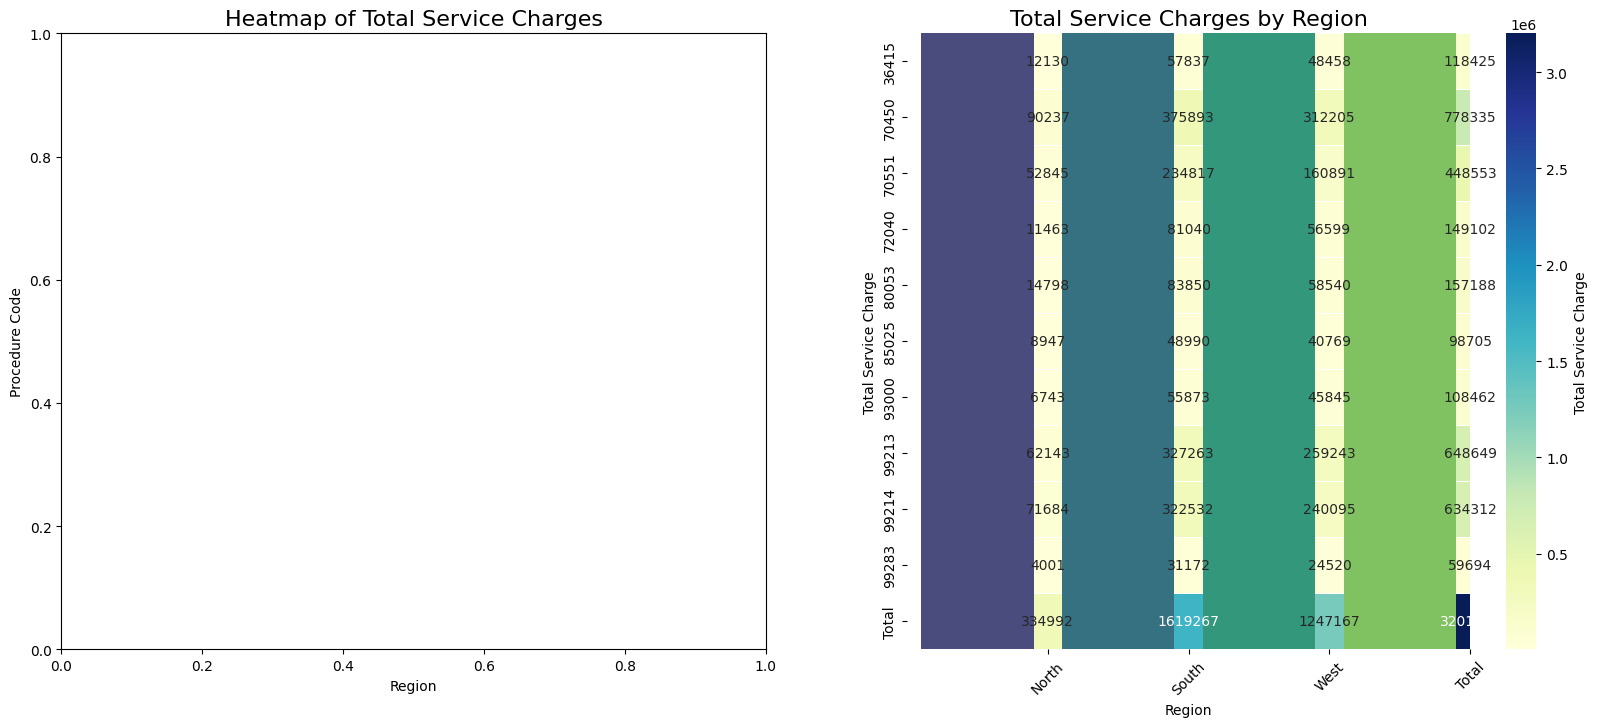

In [ ]:
# TODO: Create heatmap from pivot table
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(pivot_table['sum'],
            annot=True,
            fmt=".0f",
            cmap='YlGnBu',
            linewidths=0.5,
            cbar_kws={'label': 'Total Service Charge'},
            ax = axes[0])
axes[0].set_title("Heatmap of Total Service Charges", fontsize=16)
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Procedure Code")
# TODO: Create bar chart from pivot table
total_charges_per_region = pivot_table['sum'].sum(axis=0)
sns.barplot(x=total_charges_per_region.index, y=total_charges_per_region.values, palette='viridis', ax = axes[1])
axes[1].set_title("Total Service Charges by Region", fontsize=16)
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Total Service Charge")
axes[1].tick_params(axis='x', rotation=45)
# TODO: Save the plot as 'output/q3_pivot_visualization.png'
plt.tight_layout
plt.show
plt.savefig('output/q3_visualization.png', dpi=300, bbox_inches='tight')

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques